<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam/blob/main/pre_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi_task Cascade CNN


In [1]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.2 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [25]:
file="/content/drive/MyDrive/images.jpg"


In [26]:
from pkg_resources import fixup_namespace_packages
pixels=plt.imread (file)
detector=MTCNN()
faces=detector.detect_faces(pixels)
for face in faces:
 print(face)

2/2 [==============================] - 0s 86ms/step
{'box': [89, 44, 14, 20], 'confidence': 0.9999486207962036, 'keypoints': {'left_eye': (91, 51), 'right_eye': (95, 51), 'nose': (90, 55), 'mouth_left': (91, 61), 'mouth_right': (95, 60)}}
{'box': [172, 83, 14, 17], 'confidence': 0.9999251365661621, 'keypoints': {'left_eye': (177, 89), 'right_eye': (184, 89), 'nose': (182, 93), 'mouth_left': (177, 96), 'mouth_right': (184, 96)}}
{'box': [216, 83, 15, 21], 'confidence': 0.9997242093086243, 'keypoints': {'left_eye': (223, 90), 'right_eye': (229, 90), 'nose': (229, 93), 'mouth_left': (225, 99), 'mouth_right': (229, 99)}}
{'box': [97, 82, 15, 19], 'confidence': 0.9994555115699768, 'keypoints': {'left_eye': (101, 89), 'right_eye': (108, 89), 'nose': (105, 93), 'mouth_left': (102, 97), 'mouth_right': (108, 97)}}
{'box': [149, 80, 16, 20], 'confidence': 0.9982960820198059, 'keypoints': {'left_eye': (155, 86), 'right_eye': (162, 86), 'nose': (160, 90), 'mouth_left': (156, 95), 'mouth_right': (1

BT2

7/7 [==============================] - 0s 3ms/step


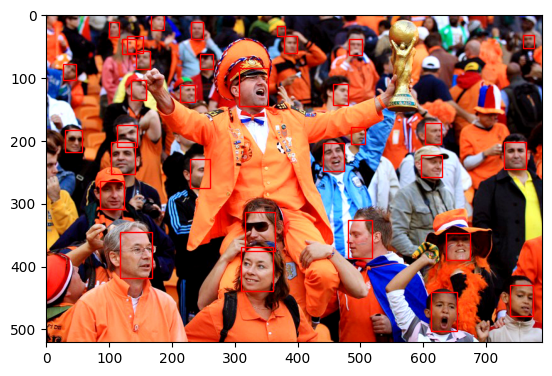

In [29]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
file="/content/drive/MyDrive/3_20221125181941.jpeg"
img=plt.imread(file)
detector=MTCNN()
faces=detector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
plt.show()

In [31]:
plt.savefig('/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien.jpeg')

<Figure size 640x480 with 0 Axes>

6/6 [==============================] - 0s 5ms/step


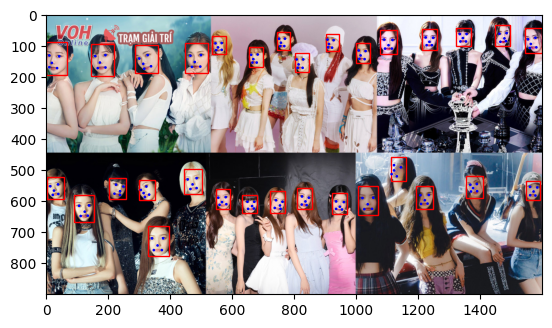

In [35]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
file="/content/drive/MyDrive/nhom-nu-gen-4-noi-bat (1).jpg"
img=plt.imread(file)
detector=MTCNN()
faces=detector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot=plt.Circle(value,radius=2,color='blue')
    ax.add_patch(dot)
plt.show()


BT3 CẮT ẢNH


6/6 [==============================] - 0s 3ms/step


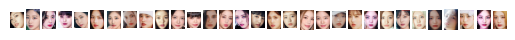

In [43]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename,result_list):
  data=plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height=result_list[i]['box']
    x2,y2=x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()
filename='/content/drive/MyDrive/nhom-nu-gen-4-noi-bat (1).jpg'
img=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(img)
draw_faces(filename,faces)


VGG16



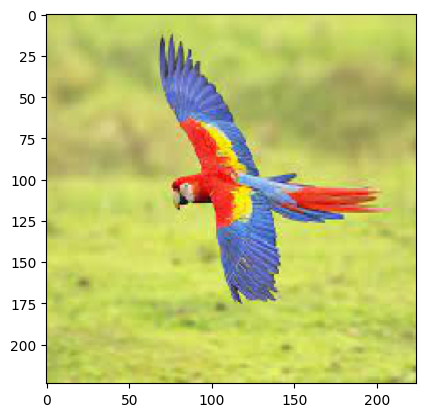

1/1 [==============================] - 0s 18ms/step
Predicted: [('n01818515', 'macaw', 0.96430635), ('n01514668', 'cock', 0.014235862), ('n01820546', 'lorikeet', 0.011042097)]


In [61]:
from IPython.utils.path import target_update
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
model = VGG16(weights='imagenet', include_top=True)

img_path = '/content/drive/MyDrive/vet.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)
plt.show()
features = model.predict(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Resnet

In [49]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


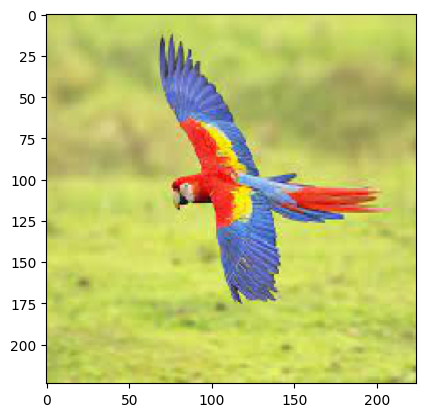

1/1 [==============================] - 0s 19ms/step
Predicted: [('n01818515', 'macaw', 0.96430635), ('n01514668', 'cock', 0.014235862), ('n01820546', 'lorikeet', 0.011042097)]


In [62]:
img_path = '/content/drive/MyDrive/vet.jpg'
img1 = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img1)
plt.show()
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

R-CNN

In [66]:
pip install mrcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54929 sha256=4876fd0d7c91a24c9ee65bfca9744b107f5ab1b6bcb1991500418c257fdbe940
  Stored in directory: /root/.cache/pip/wheels/d3/b8/c5/e10b9670fc88bf24cd34172f752e81f91dd0a2a7dca841ce2f
Successfully built mrcnn


In [71]:
import mrcnn.config

class SimpleConfig(mrcnn.config.Config):
	NAME = "coco_inference"

	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

	NUM_CLASSES = 81